In [1]:
import qiskit
from qiskit import *

In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.save_account("4aea4d729eda441663b7032d96328b32854e4edfc83a472233be082b84c09461f53c527e209f00a97236524ffb2c8943d8395ce3185fd0e269bb535aa2b5e7ee",overwrite=True)

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# 1. Quatum Teleportation

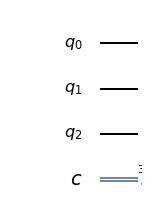

In [5]:
circuit= QuantumCircuit(3,3)
%matplotlib inline
circuit.draw(output="mpl")

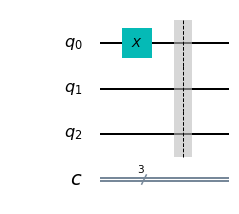

In [6]:
#Creating q0, the qubit we are trying to send
circuit.x(0)
circuit.barrier()
circuit.draw(output="mpl")

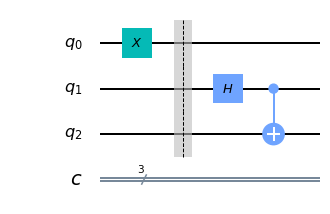

In [7]:
#Creating Bell pair in circuit using q1 and q2
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output="mpl")

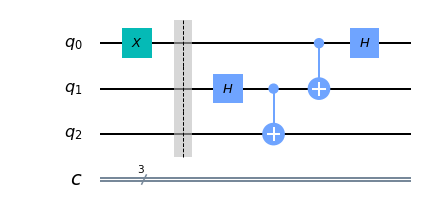

In [8]:
#We apply a CNOT gate to q1, controlled by the qubit we are trying to send
circuit.cx(0,1)
#Then we apply a Hadamard gate to q0
circuit.h(0)
circuit.draw(output="mpl")

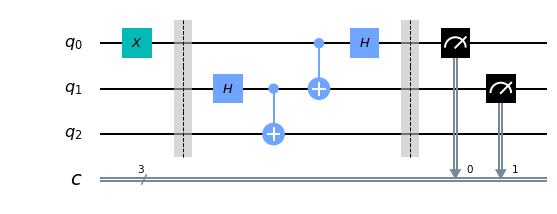

In [9]:
#We take measure of both q0 and q1
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output="mpl")

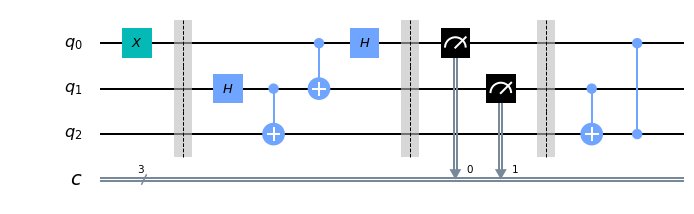

In [10]:
#Now, to get the initial q0 state we have
# (q0,q1)=(00->Do nothing, 01 -> Apply X gate, 10-> Apply Z gate, 11 -> Apply ZX gate)  
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output="mpl")

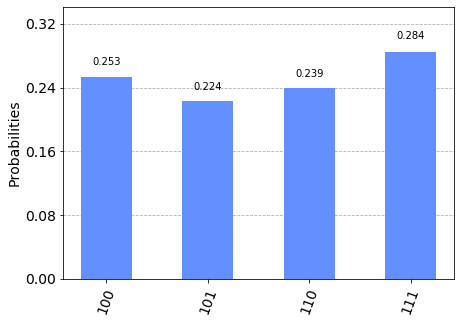

In [11]:
circuit.measure(2,2)
simulator =Aer.get_backend("qasm_simulator")
result=execute(circuit, backend= simulator, shots=1024).result()
counts=result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [12]:
print(counts)

{'101': 229, '110': 245, '111': 291, '100': 259}


# 1.1 Teleportation of entagled qubit

In [13]:
qr=QuantumRegister(3)
cr=ClassicalRegister(3)
teleportation_circuit= QuantumCircuit(qr,cr)

In [14]:
def create_bell_pair(circuit,q1,q2):
    circuit.h(q1)
    circuit.cx(q1,q2)

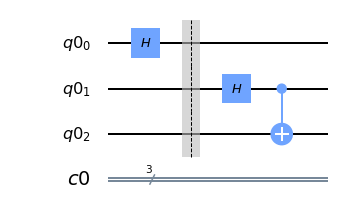

In [15]:
teleportation_circuit.h(0)
teleportation_circuit.barrier()
create_bell_pair(teleportation_circuit,1,2)
teleportation_circuit.draw(output="mpl")

In [16]:
def psi_measure(circuit, psi, q1):
    circuit.cx(psi,q1)
    circuit.h(psi)

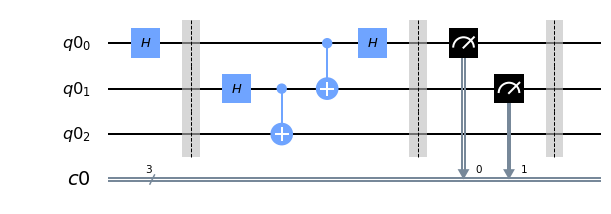

In [17]:
psi_measure(teleportation_circuit,0,1)
teleportation_circuit.barrier()
teleportation_circuit.measure([0,1],[0,1])
teleportation_circuit.barrier()
teleportation_circuit.draw(output="mpl")

In [18]:
def q2_correction(circuit,q2,q0,q1):
    circuit.cz(q0,q2)
    circuit.cx(q1,q2)
#(q0,q1)=(00->Do nothing, 01 -> Apply X gate, 10-> Apply Z gate, 11 -> Apply ZX gate)  

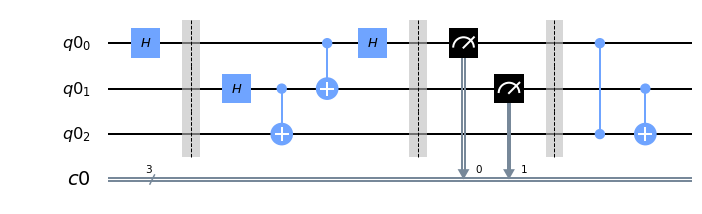

In [19]:
q2_correction(teleportation_circuit,2,0,1)
teleportation_circuit.draw(output="mpl")

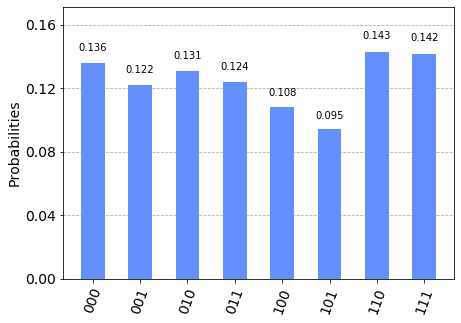

In [20]:
teleportation_circuit.measure(2,2)
simulator =Aer.get_backend("qasm_simulator")
result=execute(teleportation_circuit, backend= simulator, shots=1024).result()
counts=result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

# 2. Bernstein-Vazirani Algorithm

In [21]:
secretnumber = "101001"
circuit = QuantumCircuit(6+1, 6)

In [22]:
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

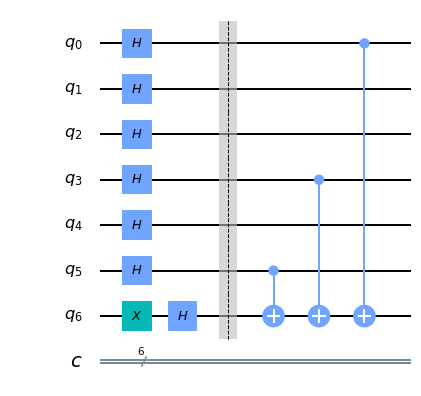

In [23]:
circuit.draw(output="mpl")

In [24]:
circuit.barrier()
circuit.h([0,1,2,3,4,5])
circuit.barrier()

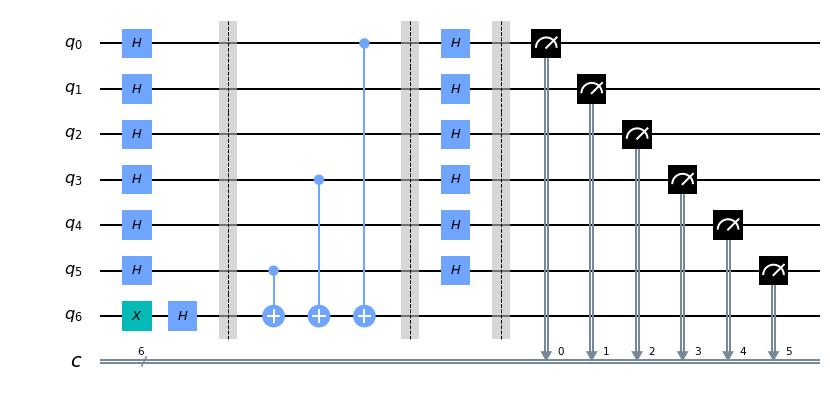

In [25]:
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw(output="mpl")

In [26]:
simulator = Aer.get_backend("qasm_simulator")
result=execute(circuit,backend=simulator,shots=1).result()

In [27]:
counts=result.get_counts()
print(counts)

{'101001': 1}


# 2.1 General algorithm

#### We will make the same algorithm but now for a general case. We will generate a random binary number and test the algorithm in a real quantum computer insted of using the qasm simulator.

In [28]:
import random 

a = random.randint(0, 1000)
secretnumber=bin(a)
l=len(secretnumber)

In [29]:
print(secretnumber)

0b111000011


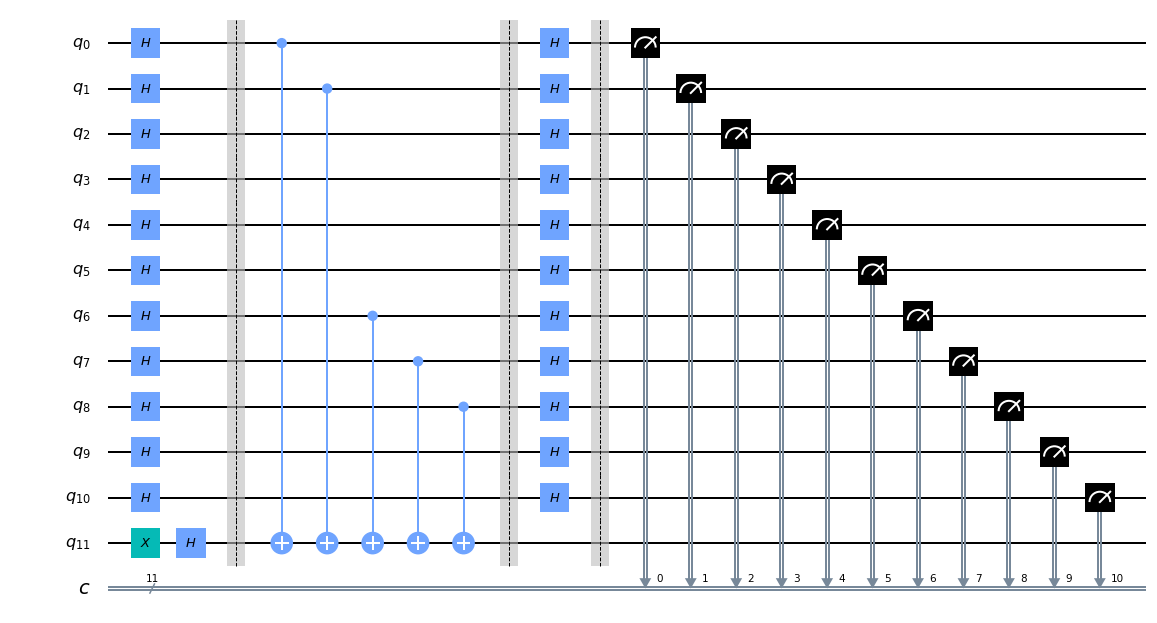

In [30]:
circuit = QuantumCircuit(l+1, l)
circuit.h(range(l))
circuit.x(l)
circuit.h(l)
circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.draw(output="mpl")

circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))
circuit.draw(output="mpl")

In [31]:
simulator = Aer.get_backend("qasm_simulator")
result=execute(circuit,backend=simulator,shots=1).result()
counts=result.get_counts()
print(counts)

{'00111000011': 1}


In [32]:
provider = IBMQ.get_provider("ibm-q")
qcomp=provider.get_backend("ibmq_16_melbourne")
job=execute(circuit,backend=qcomp, shots=8192)

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (8)     

In [ ]:
result = job.result()

In [ ]:
counts=result.get_counts()
print(counts)